# Introduction

Sao Paulo is the most populous city in Brazil with a population of 12.25 million inhabitants, as of 2019. It exerts strong international influences in commerce, finance, arts and entertainment and is listed as an alpha global city by the Globalization and World Cities Study Group (GaWC). It has the largest economy by Gross Domestic Product (GDP) in Latin America and the Southern Hemisphere, representing 10.7% of all Brazilian GDP and being home to 63% of stablished multinational companies in Brazil.

Sao Paulo is also a cosmopolitan, melting pot and ethnically diverse city, home to the largest Arab, Italian, Japanese, and Portuguese diasporas. It is also home to the largest Jewish population in Brazil, with almost 75,000 Jews. In 2016, inhabitants of Sao Paulo were native to 196 different countries.

Such a diverse culture translates to a diverse cuisine. We can find many different categories of restaurants in Sao Paulo: Italian, Asian, Argentinian, just to name a few. Sao Paulo attract many to start their businesses in the food industry, either small ones such as mobile food vendors, food truck and fast food joints, or larger ones as restaurants. Before starting to operate, though, they need to find the appropriate location to open. What do they take into account when making this decision?

# Business Problem

Upon exploring the districts of Sao Paulo, I hope to find whether opening a restaurant in a neighborhood of restaurants plays a role in the success of the business. To simplify our analysis, this report focuses on the Italian cuisine based on the total number of restaurants we can find in Sao Paulo. The methodology used here applies to other cuisines as well.

# Data

The data used in this report is listed below:

+ Districts in Sao Paulo, from the Wikipedia webpage. I scrape a list of the districts using the BeautifulSoup library in Python. The following link was used to scrape the information needed: https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o
+ Geocoder library in Python to get the geographical coordinates from the districts.
+ Foursquare API, to extract the most common venues located nearby each district, as well as their respective ratings. I filtered the search to get Italian restaurants only.

## Data Collecting

First, let us install and import some libraries.

In [1]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries installed and imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

We will begin this notebook by scraping district data, as well as their respective geographical coordinates. Since these data are not readily available in the internet, I collected the names of the districts in the city of Sao Paulo from the link displayed above. Then, I used the `Nominatim` function from `geopy.geocoders` to extract the geographical coordinates and stored it in a pandas dataframe, available at the following link: https://s3-api.us-geo.objectstorage.service.networklayer.com

In [1]:
# downloading district data from Sao Paulo
!wget -q -O 'sp_hoods.csv'  https://s3-api.us-geo.objectstorage.service.networklayer.com

The above dataframe looks like the one below.

In [2]:
df = pd.read_csv('sp_hoods.csv')
df.head()

,District,Latitude,Longitude
0,Água Rasa,-23.565372,-46.573697
1,Alto de Pinheiros,-23.549549,-46.712155
2,Anhanguera,-23.432909,-46.788534
3,Aricanduva,-23.578024,-46.511454
4,Artur Alvim,-23.539221,-46.485265


Now, let us define the Foursquare credentials, before we make our request to the API.

In [25]:
# Foursquare credentials

CLIENT_ID = 'EBPXRHHYYC0WNPBFV02NVTXJYFLFOLOYH3CRF1ZITPG0YLXL' # your Foursquare ID
CLIENT_SECRET = '4VQXH5HQDFWK3QP1L4SHIUBG45HP24JWPC20DWGSNFNZUZW0' # your Foursquare Secret
VERSION = '20200621' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EBPXRHHYYC0WNPBFV02NVTXJYFLFOLOYH3CRF1ZITPG0YLXL
CLIENT_SECRET:4VQXH5HQDFWK3QP1L4SHIUBG45HP24JWPC20DWGSNFNZUZW0


Next, we will define a function to collect all venues available in the districts, limiting to a total of 100 in a 500 meter radius. We pass in as arguments the districts names, latitudes and longitudes, and the function returns a pandas dataframe.

In [30]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=100, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['id'],
            v['venue']['name'],   
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                             'ID', 
                             'Venue', 
                             'Category']
    
    return(nearby_venues)

In [31]:
sp_venues = getNearbyVenues(names=df['District'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Água Rasa
Alto de Pinheiros
Anhanguera
Aricanduva
Artur Alvim
Barra Funda
Bela Vista
Belém
Bom Retiro
Brás
Brasilândia
Butantã
Cachoeirinha
Cambuci
Campo Belo
Campo Grande
Campo Limpo
Cangaíba
Capão Redondo
Carrão 
Casa Verde
Cidade Ademar
Cidade Dutra
Cidade Líder
Cidade Tiradentes
Consolação
Cursino
Ermelino Matarazzo
Freguesia do Ó
Grajaú
Guaianazes
Iguatemi
Ipiranga
Itaim Bibi
Itaim Paulista
Itaquera
Jabaquara
Jaçanã
Jaguará
Jaguaré
Jaraguá
Jardim Ângela
Jardim Helena
Jardim Paulista
Jardim São Luís
José Bonifácio
Lapa
Lajeado
Liberdade
Limão
Mandaqui
Marsilac
Moema
Mooca
Morumbi
Parelheiros
Pari
Parque do Carmo
Penha
Pedreira
Perdizes
Perus
Pinheiros
Pirituba
Ponte Rasa
Raposo Tavares
República
Rio Pequeno
Sacomã
Santa Cecília
Santana
Santo Amaro
São Domingos
São Lucas
São Mateus
São Miguel
São Rafael
Sapopemba
Saúde
Sé
Socorro
Tatuapé
Tremembé
Tucuruvi
Vila Andrade
Vila Curuçá
Vila Formosa
Vila Guilherme
Vila Jacuí
Vila Leopoldina
Vila Maria
Vila Mariana
Vila Matilde
Vila Medeiro

Let us take a look at our dataframe.

In [32]:
print(sp_venues.shape)
sp_venues.head()

(2640, 4)


,District,ID,Venue,Category
0,Água Rasa,4cc4780691413704fb0cc355,Bar do Albino,Bar
1,Água Rasa,515b7a2be4b0bf0be631ce38,Gaúcho Espetos,Bar
2,Água Rasa,4cfbc521dccef04d23f0bc9c,AM/PM,Convenience Store
3,Água Rasa,4cd89389a99d3704d34306ce,G.D.R. 7 de Setembro,Soccer Field
4,Água Rasa,4cd5ef0bdfb4a1cdf7595c5c,Padaria Modelar,Bakery


We were able to collect a total of 2,640 venues, but how many of them are Italian restaurants?

In [33]:
italian = sp_venues[sp_venues['Category'] == 'Italian Restaurant']
italian.head()

,District,ID,Venue,Category
95,Barra Funda,4b9678d8f964a52054ce34e3,Tanta Felicità Ristorante,Italian Restaurant
129,Bela Vista,4d458492e198721eafa9c68b,Osteria Generale,Italian Restaurant
134,Bela Vista,4c641e4d69a1c9b68ec23ca4,Fiorana Ristorante,Italian Restaurant
145,Bela Vista,4b48b347f964a520495326e3,Cantina Roperto,Italian Restaurant
163,Bela Vista,4b4d05dbf964a5202ac826e3,Cantina Lazzarella,Italian Restaurant


In [34]:
print('There are {} Italian restaurants in Sao Paulo.'.format(italian.shape[0]))

There are 49 Italian restaurants in Sao Paulo.


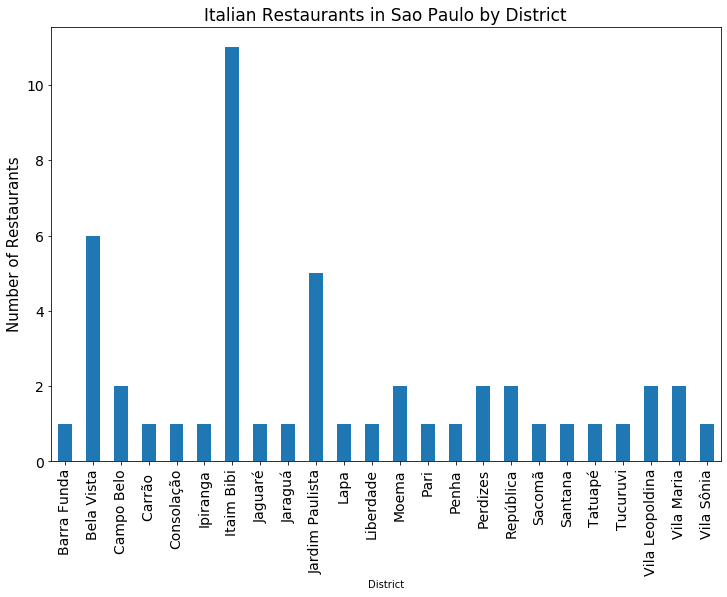

In [35]:
plt.figure(figsize=(12, 8))

italian.groupby('District')['Venue'].count().plot(kind='bar', fontsize=14)
plt.title('Italian Restaurants in Sao Paulo by District', fontsize=17)
plt.ylabel('Number of Restaurants', fontsize=15)
plt.show()

It seems like the district of Itaim Bibi hosts most of those 49 restaurants.

In [36]:
italian[italian['District'] == 'Itaim Bibi'].head()

,District,ID,Venue,Category
838,Itaim Bibi,5825ef822fea3661eaa2d23a,Modern Mamma Osteria,Italian Restaurant
850,Itaim Bibi,4b7a0e03f964a52003212fe3,Due Cuochi Cucina,Italian Restaurant
854,Itaim Bibi,4e6f891fe4cdd991623df235,Mellão,Italian Restaurant
857,Itaim Bibi,4b8d31a4f964a52096ec32e3,Millesapori,Italian Restaurant
859,Itaim Bibi,55b78851498e8e6f8631db81,Nino Cucina & Vino,Italian Restaurant


In [37]:
print('There are {} Italian restaurants in the district of Itaim Bibi.'.format(len(italian[italian['District'] == 'Itaim Bibi'])))

There are 11 Italian restaurants in the district of Itaim Bibi.


Now, we will define another function which we will use to collect information from these 49 Italian restaurants. We pass in the venues ID's as arguments and the function will return counts for likes and tips, as well as ratings for each restaurant. We will store this data in another pandas dataframe.

In [38]:
def get_venue_details(venue_id):
        
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data = results['response']['venue']
    
    venue_details=[]
    try:
        venue_name = venue_data['name']
        venue_likes = venue_data['likes']['count']
        venue_rating = venue_data['rating']
        venue_tips = venue_data['tips']['count']
        venue_details.append([venue_name, venue_likes, venue_rating, venue_tips])
    except KeyError:
        pass
        
    column_names = ['Venue', 'Likes', 'Rating', 'Tips']
    info_df = pd.DataFrame(venue_details, columns=column_names)
    return info_df

Now we will loop through our Italian restaurants dataframe to collect likes, rating and tips info.

In [39]:
column_names = ['District', 'Venue', 'Likes', 'Rating', 'Tips']
stats_sp = pd.DataFrame(columns=column_names)
count = 1

for row in italian.values.tolist():
    District, ID, Venue, Category = row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        venue, likes, rating, tips = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id = ', ID)
        
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        venue, likes, rating, tips = [0] * 4
    print('(', count, '/', len(italian),')', 'processed')
    stats_sp = stats_sp.append({'District': District, 
                                'Venue' : venue,
                                'Likes' : likes,
                                'Rating' : rating,
                                'Tips' : tips}, ignore_index=True)
    count += 1

                       Venue  Likes  Rating  Tips
0  Tanta Felicità Ristorante     62     7.1    34
( 1 / 49 ) processed
              Venue  Likes  Rating  Tips
0  Osteria Generale    993     8.8   317
( 2 / 49 ) processed
                Venue  Likes  Rating  Tips
0  Fiorana Ristorante     40     7.6    18
( 3 / 49 ) processed
             Venue  Likes  Rating  Tips
0  Cantina Roperto   1043     8.0   325
( 4 / 49 ) processed
                Venue  Likes  Rating  Tips
0  Cantina Lazzarella    491     8.0   243
( 5 / 49 ) processed
                   Venue  Likes  Rating  Tips
0  Cantina Mamma Celeste    295     7.6   170
( 6 / 49 ) processed
                    Venue  Likes  Rating  Tips
0  Restaurante Basilicata     35     7.3    14
( 7 / 49 ) processed
           Venue  Likes  Rating  Tips
0  Agello Cucina    408     9.3   180
( 8 / 49 ) processed
               Venue  Likes  Rating  Tips
0  La Cucina di Casa    195     9.1    96
( 9 / 49 ) processed
                    Venue  Like

Looking at the output above, it seems like not every restaurant had available information on likes, rating and tips. We will deal with issue later.

Let us take a look at the stats dataframe. 

In [40]:
stats_sp.head()

,District,Venue,Likes,Rating,Tips
0,Barra Funda,Tanta Felicità Ristorante,62,7.1,34
1,Bela Vista,Osteria Generale,993,8.8,317
2,Bela Vista,Fiorana Ristorante,40,7.6,18
3,Bela Vista,Cantina Roperto,1043,8.0,325
4,Bela Vista,Cantina Lazzarella,491,8.0,243


Since there is a limit to the number of daily requests we can make from the Foursuqare API, we will store this dataframe as a csv file, in case we need this information in the future.

In [43]:
stats_sp.to_csv('ita_rest_stats_sp.csv', index=False)

In [44]:
ita_stats_df = pd.read_csv('ita_rest_stats_sp.csv')
ita_stats_df.shape

(49, 5)

In [45]:
ita_stats_df.head()

,District,Venue,Likes,Rating,Tips
0,Barra Funda,Tanta Felicità Ristorante,62,7.1,34
1,Bela Vista,Osteria Generale,993,8.8,317
2,Bela Vista,Fiorana Ristorante,40,7.6,18
3,Bela Vista,Cantina Roperto,1043,8.0,325
4,Bela Vista,Cantina Lazzarella,491,8.0,243


Now, we can further inspect our dataframe to take a look at the types of each column.

In [46]:
ita_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  49 non-null     object 
 1   Venue     49 non-null     object 
 2   Likes     49 non-null     int64  
 3   Rating    49 non-null     float64
 4   Tips      49 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ KB


It seems like the column types are all appropriate. Let us see now the restaurants with the highest likes count, tips count and the highest rated.

In [49]:
# venue with most likes
ita_stats_df.iloc[ita_stats_df['Likes'].idxmax()]

District         República
Venue       Terraço Itália
Likes                 1842
Rating                 8.6
Tips                   536
Name: 38, dtype: object

In [50]:
# venue with best rating
ita_stats_df.iloc[ita_stats_df['Rating'].idxmax()]

District       Campo Belo
Venue       Agello Cucina
Likes                 408
Rating                9.3
Tips                  180
Name: 7, dtype: object

In [51]:
# venue with most tips
ita_stats_df.iloc[ita_stats_df['Tips'].idxmax()]

District         República
Venue       Terraço Itália
Likes                 1842
Rating                 8.6
Tips                   536
Name: 38, dtype: object

It looks like the restaurant Terraço Itália has the most likes and tips count. Restaurant Agello Cucina, in turn, is the highest rated. Let us see now how each district rank in terms of average rating. In the code below, we will group our statistics dataframe by district and calculate the mean value for the ratings column.

In [52]:
sp_district_stats = ita_stats_df.groupby('District', as_index=False).mean()[['District', 'Rating']]
sp_district_stats.columns = ['District', 'Average Rating']
sp_district_stats.sort_values(['Average Rating'], ascending=False).head(10)

,District,Average Rating
2,Campo Belo,9.200000
18,Santana,8.800000
13,Pari,8.700000
3,Carrão,8.500000
5,Ipiranga,8.500000
6,Itaim Bibi,8.409091
16,República,8.200000
4,Consolação,8.000000
21,Vila Leopoldina,7.950000
19,Tatuapé,7.900000


## Feature Selection

Now that we have the average ratings for every district, we will merge this column with our first dataframe, that contains the geographical coordinates for the districts. We will call this new dataframe `sp_merged`. It contains the names of the districts with at least one Italian restaurant, their respective latitude and longitudes coordinates and average rating. The latter 3 columns will be used as features for clustering.

In [57]:
sp_merged = pd.merge(sp_district_stats, df, on='District')
sp_merged = sp_merged[['District', 'Latitude', 'Longitude', 'Average Rating']]
sp_merged.head()

,District,Latitude,Longitude,Average Rating
0,Barra Funda,-23.525462,-46.667513,7.100000
1,Bela Vista,-23.562210,-46.647766,7.883333
2,Campo Belo,-23.626731,-46.669421,9.200000
3,Carrão,-23.551531,-46.537791,8.500000
4,Consolação,-23.557887,-46.660321,8.000000


When we extracted venue data from the Fursquare API, we found one restaurant without data available. So, let us take a closer look at the `Average Rating` column.

In [9]:
sp_merged['Average Rating'].min()

0.0

The zero reported here is due to missing data. Before we can proceed to run the clustering algorithm, we must drop this row.

In [11]:
sp_merged.loc[sp_merged['Average Rating'] == 0]

,District,Latitude,Longitude,Average Rating
7,Jaguaré,-23.542036,-46.749499,0.0


In [15]:
sp_merged.drop([7], inplace=True)

In [16]:
sp_merged.head(10)

,District,Latitude,Longitude,Average Rating
0,Barra Funda,-23.525462,-46.667513,7.100000
1,Bela Vista,-23.562210,-46.647766,7.883333
2,Campo Belo,-23.626731,-46.669421,9.200000
3,Carrão,-23.551531,-46.537791,8.500000
4,Consolação,-23.557887,-46.660321,8.000000
5,Ipiranga,-23.589273,-46.606162,8.500000
6,Itaim Bibi,-23.584381,-46.678444,8.409091
8,Jaraguá,-23.446658,-46.736213,5.400000
9,Jardim Paulista,-23.567436,-46.663692,7.840000
10,Lapa,-23.521576,-46.704349,7.700000


In [17]:
sp_merged.shape

(23, 4)

We will now explore the venues found in each district. In order to do this, we will use one hot enconding to find the 10 most common categories of venues present in each district.

## One Hot Encoding

First, we will filter our venues dataframe for districts with at least one Italian restaurant.

In [20]:
italian_districts = sp_merged['District'].unique()
italian_districts

array(['Barra Funda', 'Bela Vista', 'Campo Belo', 'Carrão ', 'Consolação',
       'Ipiranga', 'Itaim Bibi', 'Jaraguá', 'Jardim Paulista', 'Lapa',
       'Liberdade', 'Moema', 'Pari', 'Penha', 'Perdizes', 'República',
       'Sacomã', 'Santana', 'Tatuapé', 'Tucuruvi', 'Vila Leopoldina',
       'Vila Maria', 'Vila Sônia'], dtype=object)

In [21]:
len(italian_districts)

23

In [22]:
sp_venues_ita = sp_venues[sp_venues['District'].isin(italian_districts)]
sp_venues_ita.head()

,District,ID,Venue,Category
69,Barra Funda,4b0588c8f964a520ead922e3,Memorial da América Latina,Cultural Center
70,Barra Funda,4b962be9f964a52046bf34e3,Espaço das Américas,Music Venue
71,Barra Funda,526a8dce498e03c18b818c0c,Moça Prendada,Restaurant
72,Barra Funda,4e372bf4483bda3eb10e999d,Condomínio Liv Barra Funda,Residential Building (Apartment / Condo)
73,Barra Funda,4bec2aa1415e20a18f2be7bb,Kucho's Distribuidora de Produtos Alimentícios,Deli / Bodega


In [23]:
sp_venues_ita.shape

(1395, 4)

In [28]:
sp_venues_ita.groupby('District').count()

,ID,Venue,Category
District,,,
Barra Funda,40,40,40
Bela Vista,100,100,100
Campo Belo,94,94,94
Carrão,31,31,31
Consolação,100,100,100
Ipiranga,48,48,48
Itaim Bibi,100,100,100
Jaraguá,9,9,9
Jardim Paulista,67,67,67


In [26]:
print('There is a total of {} venues of {} different categories.'.format(sp_venues_ita.shape[0], 
                                                                         len(sp_venues_ita['Category'].unique())))

There is a total of 1395 venues of 222 different categories.


Now, we will begin our one hot encoding. We first get the dummies from the different venue categories found.

In [29]:
sp_ita_onehot = pd.get_dummies(sp_venues_ita['Category'], prefix='', prefix_sep='')
sp_ita_onehot['District'] = sp_venues_ita['District']
fixed_columns = [sp_ita_onehot.columns[-1]] + list(sp_ita_onehot.columns[:-1])
sp_ita_onehot = sp_ita_onehot[fixed_columns]
sp_ita_onehot.head()

,District,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Studio,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
69,Barra Funda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,Barra Funda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,Barra Funda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,Barra Funda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,Barra Funda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
sp_ita_onehot.shape

(1395, 223)

We will now group by district and calculate the proportions of each category.

In [31]:
sp_ita_grouped = sp_ita_onehot.groupby('District').mean().reset_index()
sp_ita_grouped.head()

,District,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Studio,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barra Funda,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000
1,Bela Vista,0.0,0.000000,0.0,0.00,0.02,0.0,0.000000,0.0,0.0,...,0.010000,0.0,0.01,0.0,0.0,0.00,0.01,0.0,0.000000,0.000000
2,Campo Belo,0.0,0.010638,0.0,0.00,0.00,0.0,0.010638,0.0,0.0,...,0.010638,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.010638,0.000000
3,Carrão,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.032258
4,Consolação,0.0,0.010000,0.0,0.01,0.00,0.0,0.000000,0.0,0.0,...,0.030000,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.000000,0.000000


In [32]:
sp_ita_grouped.shape

(23, 223)

In the above dataframe, we have one row for each district and, except for the first column, one column for each venue category.

Now, we will loop through this dataframe to find the top 5 most common venue categories present in each district. The results will be printed below.

In [33]:
num_top_venues = 5

for dist in sp_ita_grouped['District']:
    print('----' + dist + '----')
    temp = sp_ita_grouped[sp_ita_grouped['District'] == dist].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')  

----Barra Funda----
                  venue  freq
0  Brazilian Restaurant  0.10
1           Music Venue  0.10
2            Restaurant  0.10
3        Sandwich Place  0.05
4                  Café  0.05


----Bela Vista----
                venue  freq
0         Pizza Place  0.06
1  Italian Restaurant  0.06
2           Nightclub  0.05
3                 Bar  0.05
4               Hotel  0.04


----Campo Belo----
          venue  freq
0           Bar  0.11
1        Bakery  0.06
2    Restaurant  0.04
3   Pizza Place  0.04
4  Dessert Shop  0.03


----Carrão ----
                  venue  freq
0             BBQ Joint  0.10
1           Pizza Place  0.06
2  Brazilian Restaurant  0.06
3  Gym / Fitness Center  0.06
4              Pharmacy  0.06


----Consolação----
                  venue  freq
0  Brazilian Restaurant  0.07
1           Coffee Shop  0.05
2        Ice Cream Shop  0.03
3                  Café  0.03
4         Movie Theater  0.03


----Ipiranga----
                  venue  freq
0         

One thing that stands out here is Sao Paulo's diverse cuisine. Indeed, we can find restaurants, as well as other types of venues, from all around the world (Japanese, Italian, Middle Eastern, among others.

Next, we will put this information in a dataframe where the columns show the 1st up to the 10th most common venue category for each district. We will define a function to do that, then loop through our `sp_ita_grouped` dataframe once again.

In [34]:
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['District'] = sp_ita_grouped['District']

for ind in np.arange(sp_ita_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = most_common_venues(sp_ita_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barra Funda,Restaurant,Music Venue,Brazilian Restaurant,Café,Sandwich Place,Bookstore,Supermarket,Fair,Chocolate Shop,Motel
1,Bela Vista,Italian Restaurant,Pizza Place,Bar,Nightclub,Restaurant,Café,Hotel,Brazilian Restaurant,Cosmetics Shop,Coffee Shop
2,Campo Belo,Bar,Bakery,Pizza Place,Restaurant,Brazilian Restaurant,Pharmacy,Dessert Shop,Pet Store,Fast Food Restaurant,Café
3,Carrão,BBQ Joint,Convenience Store,Pharmacy,Brazilian Restaurant,Pizza Place,Gym / Fitness Center,Yoga Studio,Plaza,Electronics Store,Steakhouse
4,Consolação,Brazilian Restaurant,Coffee Shop,Ice Cream Shop,Café,Movie Theater,Vegetarian / Vegan Restaurant,Hotel,Gym / Fitness Center,Indie Movie Theater,Lounge


# Methodology

Here, we will define the features necessary to run the k-means clustering algorithm. Since k-means does not handle categorical variables, we need to drop the `District` column from the `sp_merged` dataframe.

Next, we will need to preprocess our features, since they range in different scales. We will import the `StandardScaler` function from `sklearn.preprocessing` to normalize our features. 

Finally, we instantiate the `KMeans` algorithm from `sklearn.cluster` to cluster our data. We will run the algorithm with 2, 3, 4 and 5 clusters to select the optimal number of clusters, k, according to the inertia score.

In [36]:
# importing necessary functions

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print('Functions imported.')

Functions imported.


Now, we define our features.

In [37]:
cluster_features = sp_merged.drop('District', axis=1)
cluster_features.head()

,Latitude,Longitude,Average Rating
0,-23.525462,-46.667513,7.100000
1,-23.562210,-46.647766,7.883333
2,-23.626731,-46.669421,9.200000
3,-23.551531,-46.537791,8.500000
4,-23.557887,-46.660321,8.000000


## Data Preprocessing

In [38]:
X = cluster_features.values[:, :]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[:5]

array([[ 0.54281911, -0.42071341, -0.49755158],
       [-0.34743238, -0.06007208,  0.28999778],
       [-1.91050836, -0.45555939,  1.61375097],
       [-0.08872454,  1.94841172,  0.90998345],
       [-0.24270403, -0.28936523,  0.40729237]])

## Clustering Districts

In [39]:
k = 2

k_means_2 = KMeans(n_clusters=k, random_state=0)
k_means_2.fit(cluster_dataset)
k_means_2.inertia_

51.05246644264934

In [40]:
k = 3

k_means_3 = KMeans(n_clusters=k, random_state=0)
k_means_3.fit(cluster_dataset)
k_means_3.inertia_

36.78534126892705

In [41]:
k = 4

k_means_4 = KMeans(n_clusters=k, random_state=0)
k_means_4.fit(cluster_dataset)
k_means_4.inertia_

26.883499537409577

In [42]:
k = 5

k_means_5 = KMeans(n_clusters=k, random_state=0)
k_means_5.fit(cluster_dataset)
k_means_5.inertia_

19.166050294780288

According to the elbow method, it seems that the optimal choice for the number of clusters is k = 3. Thus, we will store the estimated labels with the `labels_` attribute and append these labels in a new column in our `venues_sorted` dataframe. Then, we will merge it with our `sp_merged` dataframe.

In [43]:
# elbow k is k=3

labels = k_means_3.labels_
labels[:5]

array([1, 2, 2, 0, 2], dtype=int32)

In [44]:
venues_sorted.insert(loc=0, column='Cluster Label', value=labels)

sp_ita_nearby = sp_merged.join(venues_sorted.set_index('District'), on='District')
sp_ita_nearby.head()

,District,Latitude,Longitude,Average Rating,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barra Funda,-23.525462,-46.667513,7.100000,1,Restaurant,Music Venue,Brazilian Restaurant,Café,Sandwich Place,Bookstore,Supermarket,Fair,Chocolate Shop,Motel
1,Bela Vista,-23.562210,-46.647766,7.883333,2,Italian Restaurant,Pizza Place,Bar,Nightclub,Restaurant,Café,Hotel,Brazilian Restaurant,Cosmetics Shop,Coffee Shop
2,Campo Belo,-23.626731,-46.669421,9.200000,2,Bar,Bakery,Pizza Place,Restaurant,Brazilian Restaurant,Pharmacy,Dessert Shop,Pet Store,Fast Food Restaurant,Café
3,Carrão,-23.551531,-46.537791,8.500000,0,BBQ Joint,Convenience Store,Pharmacy,Brazilian Restaurant,Pizza Place,Gym / Fitness Center,Yoga Studio,Plaza,Electronics Store,Steakhouse
4,Consolação,-23.557887,-46.660321,8.000000,2,Brazilian Restaurant,Coffee Shop,Ice Cream Shop,Café,Movie Theater,Vegetarian / Vegan Restaurant,Hotel,Gym / Fitness Center,Indie Movie Theater,Lounge


In [45]:
sp_ita_nearby.shape

(23, 15)

Now, for each district we have their geographical coordinates, Italian restaurants average rating, cluster label and the 10 most common venue categories.

Below, I will display a map centered around the city of Sao Paulo, marking all 23 districts with Italian restaurants colored by their respective cluster label.

In [47]:
address = 'São Paulo, SP'

geolocator = Nominatim(user_agent='sp_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of São Paulo are {}, {}.'.format(latitude, longitude))

The geographical coordinates of São Paulo are -23.5506507, -46.6333824.


Since `folium` is not readily available to import, we will need to install it first. We will also import `cm` and `colors` from `matplotlib`. We will need them to create and display our map.

In [48]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.5               |   py36h830a2c2_0        10.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [49]:
k = 3 # optimal number of clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for clusters
x = np.arange(k)
ys = [i + x + (i * x) ** 2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, dist, cluster in zip(sp_ita_nearby['Latitude'], 
                                   sp_ita_nearby['Longitude'], 
                                   sp_ita_nearby['District'], 
                                   sp_ita_nearby['Cluster Label']):
    label = folium.Popup(str(dist) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        popup=label, 
        color=rainbow[cluster-1], 
        fill=True, 
        fill_color=rainbow[cluster-1], 
        fill_opacity=.7).add_to(map_clusters)
    
map_clusters

Let us save this map, in case we need it again in the future.

In [50]:
map_clusters.save('sp_dists_clustered.html')

# Results

Finally, we will take a closer look at each cluster to find out the kinds of venues we can find in each of the districts assigned to them.

In [52]:
cluster_0 = sp_ita_nearby.loc[sp_ita_nearby['Cluster Label'] == 0, 
                              sp_ita_nearby.columns[[0] + [3] + list(range(5, sp_ita_nearby.shape[1]))]]
cluster_0

,District,Average Rating,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Carrão,8.5,BBQ Joint,Convenience Store,Pharmacy,Brazilian Restaurant,Pizza Place,Gym / Fitness Center,Yoga Studio,Plaza,Electronics Store,Steakhouse
13,Pari,8.7,Clothing Store,Brazilian Restaurant,Middle Eastern Restaurant,Shopping Mall,Restaurant,Café,Warehouse Store,Women's Store,Falafel Restaurant,Bar
14,Penha,7.5,Café,Pharmacy,Supermarket,Bakery,Coffee Shop,Chocolate Shop,Japanese Restaurant,Clothing Store,Department Store,Cosmetics Shop
18,Santana,8.8,Restaurant,Pizza Place,Burger Joint,Middle Eastern Restaurant,Pharmacy,Toy / Game Store,Spa,Bookstore,Brazilian Restaurant,Gym / Fitness Center
19,Tatuapé,7.9,Ice Cream Shop,Café,Dessert Shop,Coffee Shop,Clothing Store,Pizza Place,Snack Place,Brazilian Restaurant,Restaurant,Burger Joint
20,Tucuruvi,7.2,Ice Cream Shop,Pizza Place,Fast Food Restaurant,Clothing Store,Chocolate Shop,Department Store,Dessert Shop,Market,Bakery,Snack Place
22,Vila Maria,6.8,Bar,Pharmacy,Shoe Store,Italian Restaurant,Food Truck,Breakfast Spot,Flower Shop,Brazilian Restaurant,Dessert Shop,Brewery


In [55]:
cluster_0['Average Rating'].mean()

7.914285714285714

In [53]:
cluster_1 = sp_ita_nearby.loc[sp_ita_nearby['Cluster Label'] == 1, 
                              sp_ita_nearby.columns[[0] + [3] + list(range(5, sp_ita_nearby.shape[1]))]]
cluster_1

,District,Average Rating,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barra Funda,7.10,Restaurant,Music Venue,Brazilian Restaurant,Café,Sandwich Place,Bookstore,Supermarket,Fair,Chocolate Shop,Motel
8,Jaraguá,5.40,Grocery Store,Bakery,Gym / Fitness Center,Brazilian Restaurant,Pharmacy,Pet Store,Italian Restaurant,Falafel Restaurant,Event Space,Fair
10,Lapa,7.70,Pastelaria,Brazilian Restaurant,Restaurant,Candy Store,Market,Sporting Goods Shop,Pharmacy,Bar,Bakery,Tea Room
11,Liberdade,5.60,Pizza Place,Pet Store,Farmers Market,Gym / Fitness Center,Pharmacy,Bar,Bakery,Brazilian Restaurant,Chinese Restaurant,Pastelaria
15,Perdizes,7.20,Burger Joint,Bar,Café,Restaurant,Gym / Fitness Center,Dessert Shop,Bakery,Pizza Place,Pharmacy,Ice Cream Shop
17,Sacomã,5.80,Pharmacy,Department Store,Brazilian Restaurant,Cosmetics Shop,Bar,Farmers Market,Chocolate Shop,Restaurant,Café,Martial Arts Dojo
21,Vila Leopoldina,7.95,Brazilian Restaurant,Italian Restaurant,Bar,Market,Burrito Place,Supermarket,Stadium,Fruit & Vegetable Store,Spa,Snack Place
23,Vila Sônia,6.60,Bakery,Japanese Restaurant,Grocery Store,Farmers Market,Burger Joint,Gym / Fitness Center,Pizza Place,Italian Restaurant,Deli / Bodega,Food & Drink Shop


In [56]:
cluster_1['Average Rating'].mean()

6.668749999999999

In [54]:
cluster_2 = sp_ita_nearby.loc[sp_ita_nearby['Cluster Label'] == 2, 
                              sp_ita_nearby.columns[[0] + [3] + list(range(5, sp_ita_nearby.shape[1]))]]
cluster_2

,District,Average Rating,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bela Vista,7.883333,Italian Restaurant,Pizza Place,Bar,Nightclub,Restaurant,Café,Hotel,Brazilian Restaurant,Cosmetics Shop,Coffee Shop
2,Campo Belo,9.200000,Bar,Bakery,Pizza Place,Restaurant,Brazilian Restaurant,Pharmacy,Dessert Shop,Pet Store,Fast Food Restaurant,Café
4,Consolação,8.000000,Brazilian Restaurant,Coffee Shop,Ice Cream Shop,Café,Movie Theater,Vegetarian / Vegan Restaurant,Hotel,Gym / Fitness Center,Indie Movie Theater,Lounge
5,Ipiranga,8.500000,Burger Joint,Bakery,Pizza Place,Pet Store,Brazilian Restaurant,Gym,Gastropub,Empanada Restaurant,Beer Store,Electronics Store
6,Itaim Bibi,8.409091,Italian Restaurant,Japanese Restaurant,Restaurant,Hotel,Brazilian Restaurant,Burger Joint,Bar,Ice Cream Shop,French Restaurant,Dessert Shop
9,Jardim Paulista,7.840000,Italian Restaurant,Gym / Fitness Center,Restaurant,Hotel,Spanish Restaurant,Burger Joint,Coffee Shop,Café,Spa,Bar
12,Moema,7.900000,Dessert Shop,Furniture / Home Store,Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Gym / Fitness Center,Massage Studio,Pharmacy,Sushi Restaurant,Italian Restaurant
16,República,8.200000,Brazilian Restaurant,Bar,Coffee Shop,Record Shop,Café,Pizza Place,Tea Room,Theater,Restaurant,Burger Joint


In [57]:
cluster_2['Average Rating'].mean()

8.241553030303029